# Computational Essay - Simulating a cyclotron

A computational essay by Vebjørn Hallberg Bakkestuen

## Introduction
We will investigate the basic behavior of a simple particle accelerator, a cyclotron. The basic idea of a cyclotron is to place a particle in the middle of the accelerator and accelerate it using a powerful electric field.

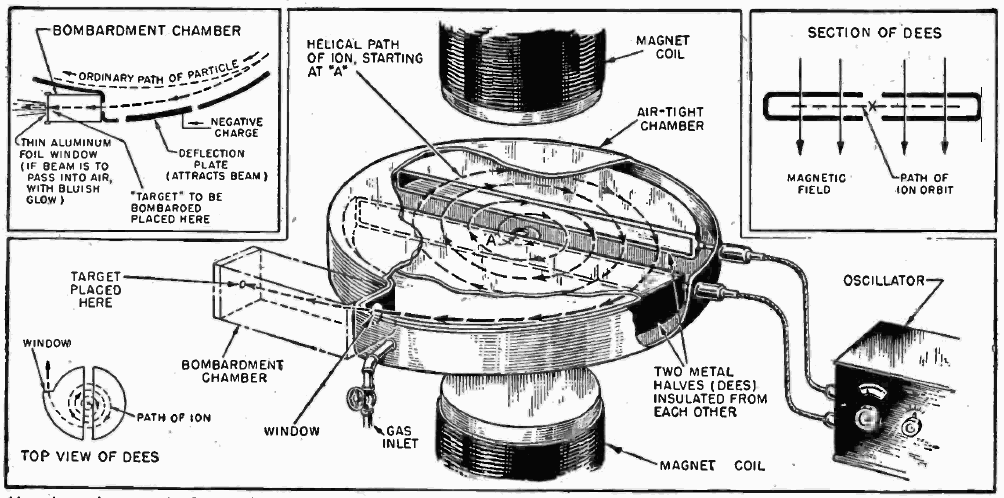 
The figure shows a diagram of a common setup of a cyclotron (Illistration: Wikipdia). The cyclotron is circularly shaped, consisting of two halves separated by a distance $d$. Between these two parts there is a difference in electric potenitial, not unlike that of a parallel plate capasitor. The difference in potential creates the electric field responsible for accelerating the particle and it is therfore essensial that the plates are well insulated in order to be able to maintain a large difference in potensial. However an electric field is not on it´s own able to accelerate a charge into a circular orbit due to it only working along one direction, from one halve to the other. In order to curve the particle we will apply a magnetic field as shown in the diagram. The magnetic field is typically created by two powerful electro magnets, located on each side of the cyclotron in order to create a stabile magnetic field perpendicular to the motion of the particle.

We observe that if the electric field between the two halves remains constant along the same direction, the electric force will be oposite of the motion of the particle after half a lap. In order to continously accelerate the particle we will have to flip the direction of the field, or in other words swich up the potenital difference. This needs to be done periodically in order to keep up with the particle. In the below model we have elected to let the voltage variate as a cosine function, dependent on the angular frequency and time.

In order to better understand some of the workings of a cyclotron we will simulate the motion of both a proton and an electron as they accelerate in the cyclotron. In ordrer to simplify these calculations we will assume that no other forces than the electric and magnetic force acts on the particle. Given that this is a bold assumption disreagrding the effects of friction and gravity we will also briefly investegate to what extent gravity will have an effect on the charged particle. Furthermore we will implement a relativistic approach to a cyclotron as we expect the velocities in a cyclotron to rather rapidly aproach the speed of light.

## Simulation of the Cyclotron

First, we import our standard libraries: Numpy, Sympy, and matplotlib required for the simulation and define a constant.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
c = 299_792_458  #speed of light [m/s]

We know the force acting on a charged particle as the Lorentz´force, given by
$$ \vec{F} = q \vec{E} + q \vec{v}\times \vec{B}$$
Assuming that the particle begins without a velocity, the magnetci komponent will always be perpendicular to the velocity. If we disregard the any frictional forces we observe that in order to maximize the acceleration of the particle the electric field needs to be parallel with the velocity. Assuming that the gap between the halves is small the electric field sholud therfore be pointing in $x$-direction, given that the electric field is oriented along the $z$-direction.

In order to flip the electric field as the partcle is accelerated we oberve that the particle must have a constant angular velocity, or in other words an constant angular frequency. This is a result of the fact that the magnetic force component is perpendicular to the electric force component, and the fact that both the electric and magnetic fields are indepentent for the velocity of the particle. As a result we define the cyclotron frequency, which is the frequency that determines when the electric field should switch to impart maximum speed to the particle. Assuming the gap between the halves (D's) is small, we can find this by setting the magnetic force equal to the expression for circular motion: 
$$F = qvB = \frac{M v^2}{r}$$ 
$$r = \frac{mv}{qB}$$ 
And then substituting this expression into the expression for the time for one full rotation, 
$$T = \frac{2 \pi r}{v} = \frac{2 \pi m}{qB}$$

Converting this into angular frequency, we end up with 
$$\omega_{cyclotron} = \frac{2 \pi}{T}=\frac{qB}{m}$$

We are now ready to begin simulating the motion of a arbitary charged particle, beginning by defining a function calculating the net force on the particle. We assume that the only forces acting on the particle is the electric force and the force as a result of the magnetic field. We therefore implement the Lorentz´ force under the assumtion that the electric field is oriented along the $x$-direction and variating in time as a $E(t) = E_0\cos \omega t$ wich ensures that the field flips correctly.  The electric field at maximum is given by $E_0 = \frac{V}{d}$ where $V$ is the difference in potential between the halves.

In [2]:
def F_net(r,v,t,B,q,m,V):
    d = 90e-6 #Set the separation between the plates to 90 micrometers
    E_0 = V/(d) #define the electric field based on voltage between the D's and separation
    
    w = q*np.linalg.norm(B)/m #define the cyclotron frequency 

    F = np.zeros(3)
    if np.absolute(r[0]) < d/2: #if the particle is between the two D's calculate the electric force
        F[0] = q*E_0*np.cos(w*t)
    else: #if the particle is not, calculate the magnetic force
        F = q*np.cross(v,B)
    return F

Having defined the net force we are able to calculate the motion of a charged particle using nummerical integration. We begin by defining four arrays, for the position, velocity, net force and time. Using these we nummerically integrate the motion of the charged particle until the raduis of the particle path becomes greather than the radius of the cyclotron, at wich we assume that the particle has exited the cyclotron. We therfore return the arrays containing the motion up til this point form the function. 

In [3]:
def cyclotron(q,m,B,dt,T,V=50_000): #Set voltage between the plates to 50kV
    N = int(T/dt)
    r_cyclotron = .05 # set the radius of the D's to 5cm
    
    r = np.zeros((N,3)) # create a array for the position of the particle.
    v = np.zeros((N,3)) # create a array for the velocity of the particle.
    t = np.zeros(N)
    
    F = np.zeros((N,3)) # create a array for the net force on the particle.
    
    i = 0
    while (np.linalg.norm(r[i]) < r_cyclotron): # loop while the magnitude of the particle's position remains within the cyclotron radius
        F[i] = F_net(r[i], v[i], t[i], B, q, m, V)
        v[i+1] = v[i] + F[i] / m * dt
        r[i+1] = r[i] + v[i+1] * dt
        t[i+1] = t[i] + dt
        i+=1
        
    print(f"The final speed of the particle is {np.linalg.norm(v[i]):.3e} m/s")
    return r[:i], v[:i], t[:i]

Now having defined the an integration loop calculating the motion of the particle we can compute and plot the motion. Because of the succesive acceleration of the particle we expect the particle to move in an outwards expanding spiraling motion dependent on a ratio between the electric field and the magnetic field. We begin by testing the cyclotron with a proton, computing over a small window of time with an even smaller timestep. The simulation time is expected to be rather small because the particle is rather ligth and the electric field strong giving us:

The final speed of the particle is 6.410e+06 m/s
Total time in cyclotron: 1.012e-07 s


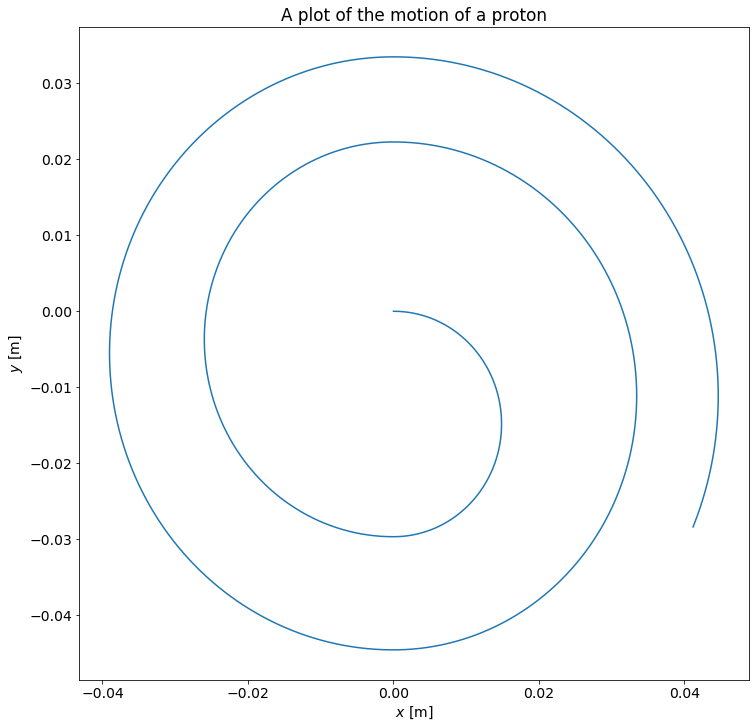

In [4]:
B = np.array([0.0,0.0,1.5]) #Set magnetic field to 1.5T in the +Z directio
q = 1.6e-19 #Set the charge of the particle to the charge of a proton
m = 1.67e-27 #Set mass of the particle to the mass of a proton
dt = 5e-12

r,v,t = cyclotron(q,m,B, dt, 1e-5)
print(f"Total time in cyclotron: {t[-1]:.3e} s")
plt.figure(figsize=(12,12)) #create the figure
plt.rc('font', size=14)
plt.title("A plot of the motion of a proton")
plt.xlabel("$x$ [m]")
plt.ylabel("$y$ [m]")
plt.plot(r[:,0], r[:,1]) #create the plot

We have now seen how we expect that a proton will behave in a cyclotron, this seems in to be in accordance of our expectations and for now everything seems to behave nicely.

Simularly can we investigate how an electron will behave. This requires only small adjustments to the previous code. We need only to change the mass as well as the sign of the charge this gives us, we need also significantly reduce the timestep because the mass is so much lighter in order to be able to compute it´s trajectory without it diverging to powerfully.

The final speed of the particle is 1.320e+10 m/s
Total time in cyclotron: 2.698e-09 s


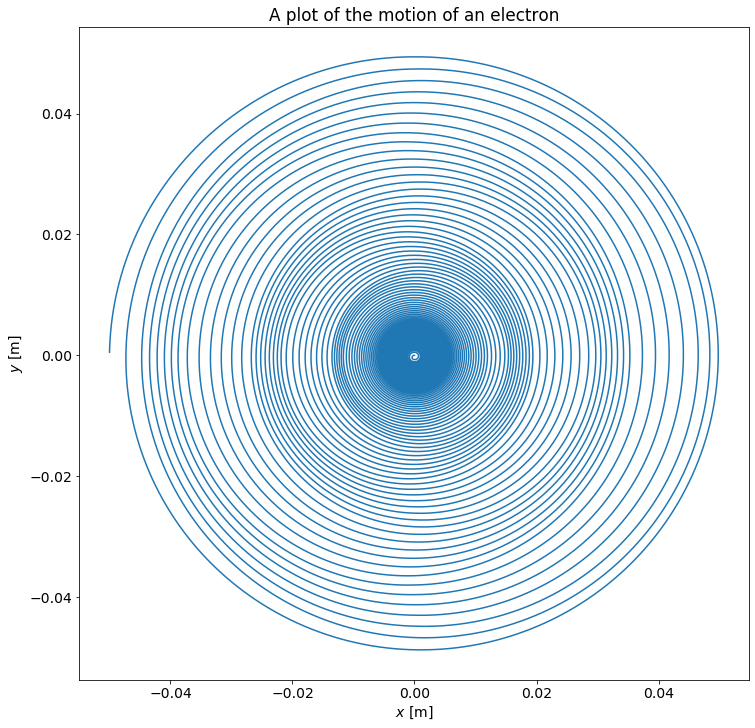

In [5]:
B = np.array([0.0,0.0,1.5]) #Set magnetic field to 1.5T in the +Z directio
q = - 1.6e-19 #Set the charge of the particle to the charge of a electron
m = 9.10938356e-31 #Set mass of the particle to the mass of an electron
dt = 5e-14

r,v,t = cyclotron(q,m,B, dt, 1e-8)
print(f"Total time in cyclotron: {t[-1]:.3e} s")
plt.figure(figsize=(12,12)) #create the figure
plt.rc('font', size=14)
plt.title("A plot of the motion of an electron")
plt.xlabel("$x$ [m]")
plt.ylabel("$y$ [m]")
plt.plot(r[:,0],r[:,1]) #create the plot

Where we can see that something obviously has gone wrong. From Albert Einsteins theroy of special relativity we know that nothing can travel with a velocity greater than the speed of light, which is approximatly $c\approx 8 \times 10^8$ m/s. We see that when using the same parameters as for the much heavier proton the electron recieves a significantly greather velocity. This is kind of as expected and as a result of these high and unphysical velocities we must implement a relativistic approach in order to account for these effects, but we will return to that later on.

First we will however briefly investigate to what extent the gravity will have an affect on the a particle in a cyclotron. Since the acceleration period of a particle is very short, we do not expect it to have a significant effect. We will for simplicity assume that the gravity is uniform inside the accelerator with a value of $g= -9.81$ m/s$^2$ in the $z$-direction, wich form our ordinary experience seems to be a good assumption. The force will then be defined by
$$\vec{G} = g\hat{k}$$
We observe that adding this to the code form before is a small task. First we define a function of gravity:

In [6]:
def G(m):
    return np.array([0,0,-9.81*m])

Furthermore we overload the function calculating the net force from before by adding gravity. It will now be dependent on three forces:

In [7]:
def F_net(r,v,t,B,q,m,V):
    d = 90e-6 #Set the separation between the plates to 90 micrometers
    E_0 = V/(d) #define the electric field based on voltage between the D's and separation
    
    w = q*np.linalg.norm(B)/m #define the cyclotron frequency 
    F = np.zeros(3)
    
    if np.absolute(r[0]) < d/2: #if the particle is between the two D's calculate the electric force
        F[0] = q*E_0*np.cos(w*t)
    else: #if the particle is not, calculate the magnetic force
        F = q*np.cross(v,B)
    return F + G(m)

Once again can we calculate the position of an proton and in addition we can print out the last position of the particle in $z$-direction:

The final speed of the particle is 6.410e+06 m/s
Last position i z-direction: -5.028e-14 m
Total duration of simulation: 1.012e-07 s


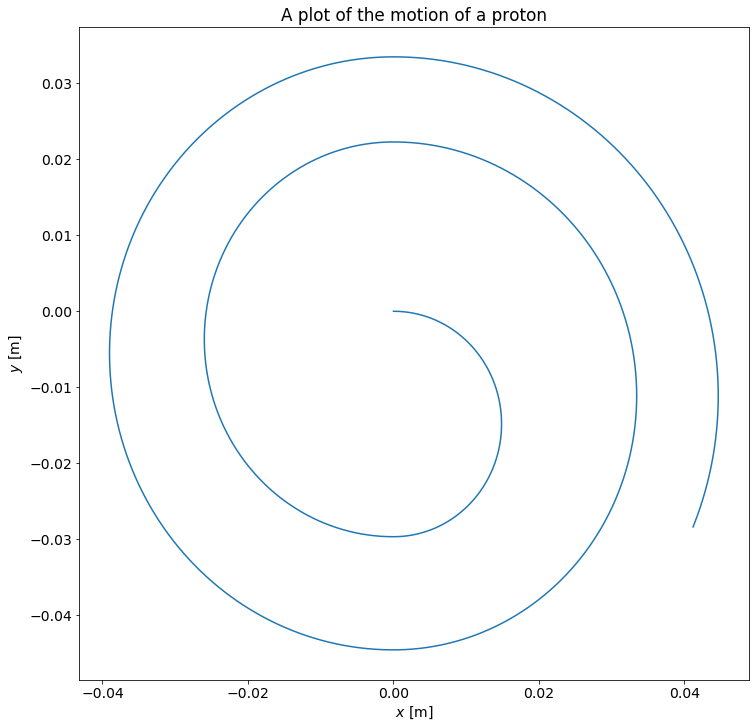

In [8]:
B = np.array([0.0,0.0,1.5]) #Set magnetic field to 1.5T in the +Z directio
q = 1.6e-19 #Set the charge of the particle to the charge of a proton
m = 1.67e-27 #Set mass of the particle to the mass of a proton
dt = 5e-12

r,v,t = cyclotron(q,m,B, dt, 1)
plt.figure(figsize=(12,12)) #create the figure
plt.rc('font', size=14)
plt.title("A plot of the motion of a proton")
plt.xlabel("$x$ [m]")
plt.ylabel("$y$ [m]")
plt.plot(r[:,0], r[:,1]) #create the plot
print(f"Last position i z-direction: {r[-1,2]:.3e} m")
print(f"Total duration of simulation: {t[-1]:.3e} s")

This shows us that gravity doesn´t affect the movement of the particle and that change in the vertical position is slim to non, even compared to the scale of the movement. We can therfore conclude that it is a goood assumption to ignore the effects of gravity alltogether. It is however reasonable to assume that larger accelerators or accelerators that accelerates particles over longer periods of time than a cyclotron, need to consider the effects of gravity.

Since we know the velocity of the particle we are also able to compute the energy of the particle. We observe that for most applications, for example cancer treatment, we are only interested in the kinetic energy of the particle. For non-relativistic particles we know that the kinetic energy of a particle is given by 
$$ E_k = \frac{1}{2} m v^2$$
where $m$ is the mass of the particle. Equipped with this rahter simple relationship we are able to compute the kinetic energy of the particle as a function of time:

In [9]:
def Ek(m,v):
    return 0.5 * m * np.linalg.norm(v,axis=1)**2

which gives us:

The exit velocity of the particle is: 3.431e-14 J
Wich corresponds to an energy of: 2.141e+05 eV


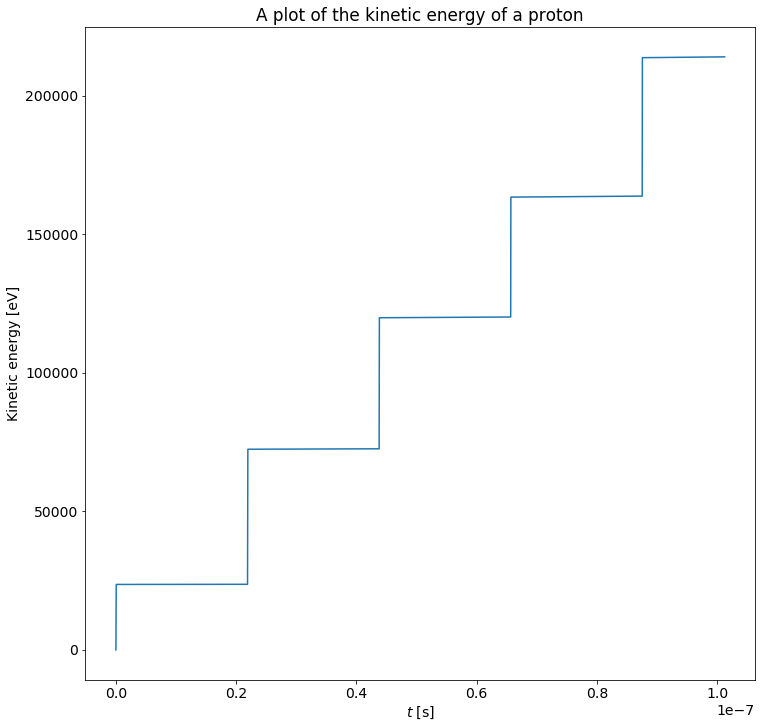

In [10]:
E = Ek(m,v)
eV = 1.60217662 * 1e-19
plt.figure(figsize=(12,12)) #create the figure
plt.rc('font', size=14)
plt.title("A plot of the kinetic energy of a proton")
plt.xlabel("$t$ [s]")
plt.ylabel("Kinetic energy [eV]")
plt.plot(t, E/eV)
print(f"The exit velocity of the particle is: {E[-1]:.3e} J")
print(f"Wich corresponds to an energy of: {E[-1]/eV:.3e} eV")

Here we see that the kinetic energy increases descrete steps. This is a result of the fact that the particle is accelerated only when it passes the slit between the halves of the accelerator. This is also apparent on the absolute velocity of the particle:

The last velocity was: 0.021 c


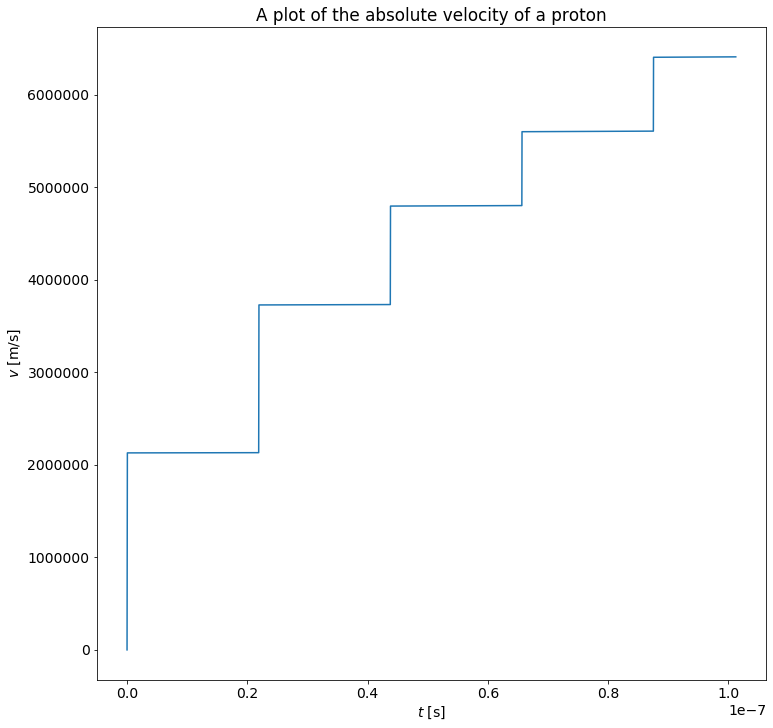

In [11]:
plt.figure(figsize=(12,12)) #create the figure
plt.rc('font', size=14)
plt.title("A plot of the absolute velocity of a proton")
plt.xlabel("$t$ [s]")
plt.ylabel("$v$ [m/s]")
plt.plot(t, np.linalg.norm(v,axis=1))
print(f"The last velocity was: {np.linalg.norm(v[-1])/c:.3f} c")

From the above plot, as well as the motion of the electron, we see that the velocity of a particle rather rapidly approaches relativistic velocities. We know that the effects of spetial relativity begin to gain importance over the simualtions at speeds close to the speed of light. 

We observe that more powerful magnetic fields curves the path of the particle more. Hence we observe that by amplifying the magnetic field inside the cyclotron, we effectivly increases the escape velocity of the particlce. This is a result of the particle compleationg more laps, and a larger time, inside the accelerator. As a result of this we observe that it is possible to accelerate also protons to relativistic velocities, although his requires a significantly more powerful magnetic field inside the cyclotron. We can also increase the velocity of a particle by increasing the voltage between the halves.

We will continue by investigating how we can consider the relativistic effects an particle might experience in the cyclotron. From Einstein´s theory of special relativity we know that at high relative velocities distances are compressed and time is streched. We also know that it becomes increasingly difficult to accelerate particels as they approach the speed of light, and as a result it is impossible for a particle whith mass to reach the speed of light. We will take use of the increase in mass of a particle at high velocities, wich can be expressed as
$$ m = m_0 \gamma$$ 
where $m$ is the mass of the moving particle, $m_0$ is the mass of the particle at rest and 
$$ \gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$
is the Lorentz´factor. In order to keep accelerating the particle we need to adjust the angular frequency. The relativistic angular frequency is given by
$$ \omega = \frac{\omega_0}{\gamma} = \frac{qB}{m_0\gamma} = \frac{qB}{m}$$
We observe that we impliment this nummerically by simply multiplying the masses by the Lorentz´factor, this is however not the whole solution.

Generally we can express Newton´s second law as
$$ \vec{F} = \frac{d\vec{p}}{dt}$$
and for normal applications this is equivalent with mass times acceleration, but in the case of relativistc motion the mass vary with the velocity giving us
$$ \vec{F} = \frac{d}{dt}( m_0\gamma \vec{v})$$
and by the rule of multiplication this becomes
$$ \vec{F} = m_0\left( \frac{d}{dt}(\gamma) \vec{v} + \gamma\frac{d}{dt}(\vec{v}) \right) = m_0 \left( \gamma^3\frac{\vec{v} \cdot\vec{a}}{c^2} \vec{v} + \gamma \vec{a}\right)$$
where we have used that 
$$ \frac{d}{dt}(\gamma)  = \frac{\vec{v}\cdot \vec{a}}{c^2(1- \frac{v^2}{c^2})^{3/2}} = \gamma^3 \frac{\vec{v}\cdot \vec{a}}{c^2}$$
Solving this for the acceleration, wich requires multiple steps, we get
$$ \vec{a} = \frac{1}{m_0\gamma}\left( \vec{F} -\frac{(\vec{v}\cdot \vec{F})\vec{v}}{c^2} \right)$$
On the basis of this we find that for the magnetic field $\vec{v}\cdot \vec{a} = 0$ because the force from the magnetic field is always perpendicular to the velocity. Giving
$$\vec{a}_m = \frac{\vec{F}_m}{m_0\gamma }$$
however in the case of the electric field the expression becomes a bit more complicated:
$$ \vec{a}_e = \frac{1}{m_0\gamma}\left( \vec{F}_e -\frac{(\vec{v}\cdot \vec{F}_e)\vec{v}}{c^2} \right)$$ 

Equiped with these new equations we are now ready to modify our nummerical model:

In [12]:
def F_net(r,v,t,B,q,m, V):
    gamma = 1/(1-(np.linalg.norm(v)/c)**2)
    d = 90e-6 #Set the separation between the plates to 90 micrometers
    E_0 = V/(d) #define the electric field based on voltage between the D's and separation
    
    w = q*np.linalg.norm(B)/m #define the cyclotron frequency 

    F = np.zeros(3)
    Fe = np.array([q*E_0*np.cos(w*t), 0, 0])
    if np.absolute(r[0]) < d/2: #if the particle is between the two D's calculate the electric force
        #F = np.array([Fe[0] - np.sqrt(v[0]*Fe[0])* v[0], np.sqrt(v[0]*Fe[0])* v[1], np.sqrt(v[0]*Fe[0])* v[2]])/c**2 
        F = Fe - np.sqrt(v[0]*Fe[0])* v / c**2
    else: #if the particle is not, calculate the magnetic force
        F = q*np.cross(v,B)
    return F 

In [13]:
def cyclotron_rel(q,m,B,dt,T,V=50_000): #Set voltage between the plates to 50kV
    N = int(T/dt)
    
    r = np.zeros((N,3))
    v = np.zeros((N,3))
    t = np.zeros(N)
    
    F = np.zeros((N,3)) #create a vector for the net force on the particle.

    r_cyclotron = .05 #set the radius of the D's to 5cm

    i = 0
    while (np.linalg.norm(r[i]) < r_cyclotron) and i<N-1: # loop while the radius of the proton's path remains within the cyclotron radius
        gamma = 1/(1-(np.linalg.norm(v[i,:])/c)**2)
        F[i] = F_net(r[i], v[i], t[i], B, q, m * gamma, V)
        v[i+1] = v[i] + F[i] / (m * gamma) * dt
        r[i+1] = r[i] + v[i+1] * dt
        t[i+1] = t[i] + dt
        i+=1
    print(m, m*gamma)    
    print(f"The final speed of the particle is {np.linalg.norm(v[i]):.3e} m/s")
    print(f"The final speed of the particle is {np.linalg.norm(v[i])/c:.3f} c")
    return r[:i], v[:i], t[:i]

Having implemented these changes try computing the motion of a proton with the same parametes as before.

1.67e-27 1.6707526473322808e-27
The final speed of the particle is 6.363e+06 m/s
The final speed of the particle is 0.021 c
Total duration of simulation: 1.012e-07 s


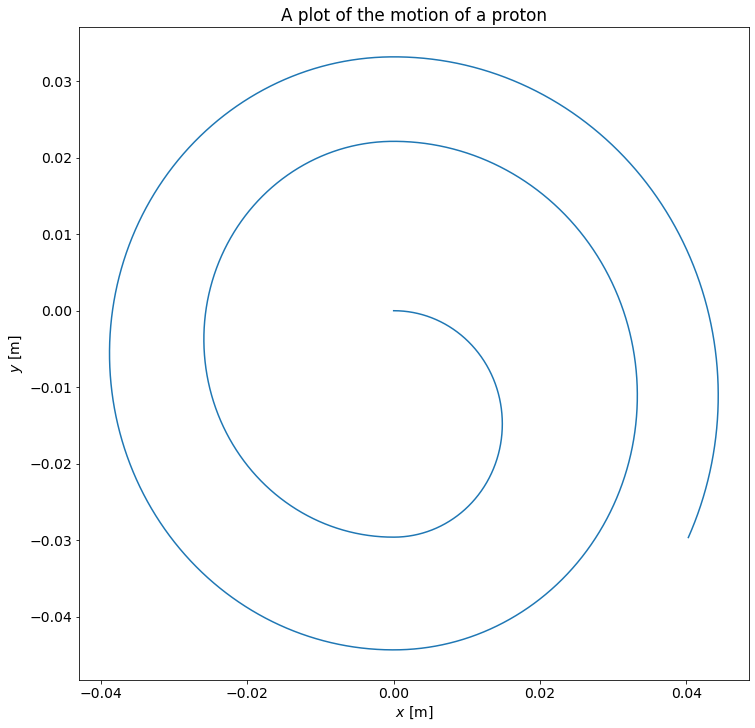

In [14]:
B = np.array([0.0,0.0,1.5]) #Set magnetic field to 1.5T in the +Z directio
q = 1.6e-19 #Set the charge of the particle to the charge of a proton
m = 1.67e-27 #Set mass of the particle to the mass of a proton
dt = 5e-12

r_rel,v_rel,t_rel = cyclotron_rel(q,m,B, dt, 1e-6)
plt.figure(figsize=(12,12)) #create the figure
plt.rc('font', size=14)
plt.title("A plot of the motion of a proton")
plt.xlabel("$x$ [m]")
plt.ylabel("$y$ [m]")
plt.plot(r_rel[:,0], r_rel[:,1]) #create the plot
print(f"Total duration of simulation: {t[-1]:.3e} s")

Having computed the motion of electron with relativistic effects we can also plot the absolute velocity of the particle in order to see how the velocity increases. Since the mass of the particle goes to infinity as the velocity approaches the speed of light we expect that the velocity will go as $e^{-u}$ for $u \in [0,\infty)$ because the acceleration of the particle must decrease as the mass increases as the forces acting on the particle is not dependent of the velocity.

In [ ]:
plt.figure(figsize=(12,12)) #create the figure
plt.rc('font', size=14)
plt.title("A plot of the absolute velocity of a proton")
plt.xlabel("$t$ [s]")
plt.ylabel("$v$ [m/s]")
plt.plot(t_rel, np.linalg.norm(v_rel, axis=1)/c, label='Relativistic')
plt.plot(t, np.linalg.norm(v, axis=1)/c, label='Classical')
plt.legend()
print(np.linalg.norm(v[-2])/c)

Form the above plot we see that the difference in the absolute velocity between the two methods is slim at small velocities compared to the speed of light, but if we recompute the cyclotrons with more powerful magentic and electric fields we expect the difference to be more apparent. Because we expect the velocities to become much greather we lower the timestep to reduce the nummerical error.

1.67e-27 1.703952833424033e-27
The final speed of the particle is 4.232e+07 m/s
The final speed of the particle is 0.141 c
Total duration of simulation: 6.922e-08 s
The final speed of the particle is 4.540e+07 m/s
Total duration of simulation: 7.454e-08 s


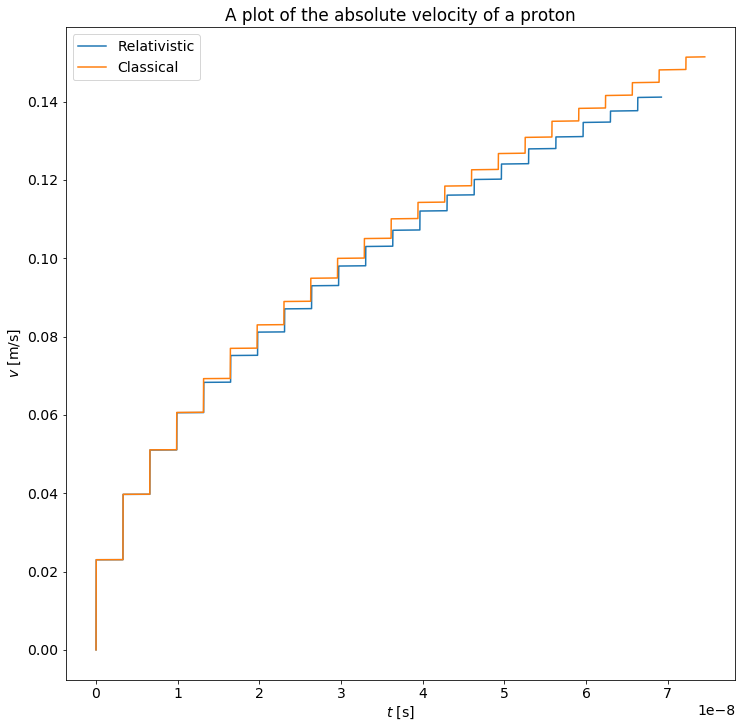

In [17]:
B = np.array([0.0,0.0,10]) #Set magnetic field to 1.5T in the +Z directio
q = 1.6e-19 #Set the charge of the particle to the charge of a proton
m = 1.67e-27 #Set mass of the particle to the mass of a proton
dt = 5e-13

r_rel,v_rel,t_rel = cyclotron_rel(q,m,B, dt, 1e-6, V=500_000)
print(f"Total duration of simulation: {t_rel[-1]:.3e} s")
r,v,t = cyclotron(q,m,B, dt, 1e-6, V=500_000)
print(f"Total duration of simulation: {t[-1]:.3e} s")

plt.figure(figsize=(12,12)) #create the figure
plt.rc('font', size=14)
plt.title("A plot of the absolute velocity of a proton")
plt.xlabel("$t$ [s]")
plt.ylabel("$v$ [m/s]")
plt.plot(t_rel, np.linalg.norm(v_rel, axis=1)/c, label='Relativistic')
plt.plot(t, np.linalg.norm(v, axis=1)/c, label='Classical')
plt.legend()

From the above figure we see that despite of the uneven increase in velocity that the relativistically computed veliocity falls of a lot faster than the classically computed velocity. This is as expected because of the increasing mass of the relativistic proton, we also see that the exit velocity is greather in the classical approach.

One major problem with our model is our disregard of frictional forces. In a real cyclotron, altough there is a vaccum there will inevitably be frictional forces due to the production of heat in the materials and other interactions. We have also disregarded the fact that in reality the magnetic fields produced by the electromagnets and the electric field over the gap does not necessarily have only one directional componet or beeing completly uniform. With today´s technology this is however not necessarily the greatest concern.  

We have also disregarded the fact that in a real cyclotron we need the particle(s) to exit at a precise loacation in order to get a viable usage of the accelerator, for example for medical use. A possible method of steering a particle beem is illustrated in the diagram at the beginning of the essay. This uses charged plates to steer the particle beem towards the exit window.

## Conclusion

Having investigated some of the basic principles of a cyclotron we are now able to draw some conclutions from our simulations. We have seen that an electron is accelerated in by a cyclotron in the same manner as a proton as expected, altogh it experiences a much greater acceleration due to it´s significantly smaller mass. As a result of our test with a electron we see that a light particle like electron rapidly reaches relativistic velocities. Having  implimented the relativistic effect of increasing mass, we have seen that the change in the velocity of a particle decreases as the particle approaches the speed of light. Furthermore we have seen that the gravitational effects on a particle is small, due to the small time of acceleration in the cyclotron and it is therefore a good approximation to disregard this. 

## References

In this essay we have used some external sources in order to more accuratly describe the workings of a cyclotron. These include 
- https://en.wikipedia.org/wiki/Cyclotron
- https://en.wikipedia.org/wiki/Relativistic_mechanics